In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Análisis Exploratorio de Datos (EDA)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

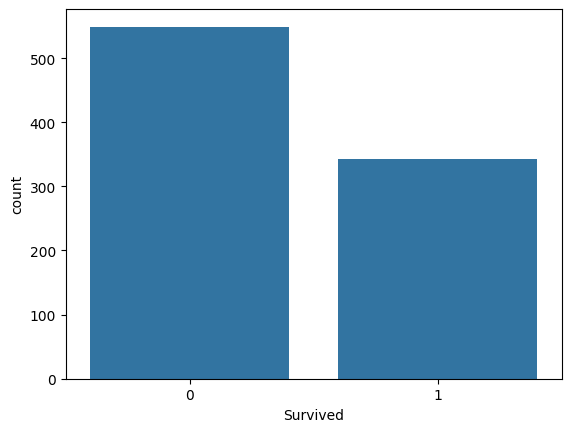

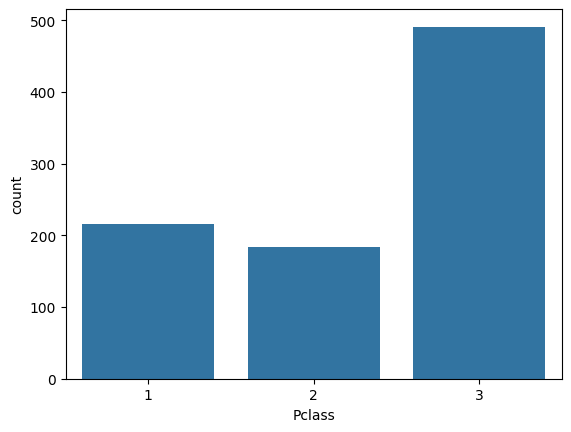

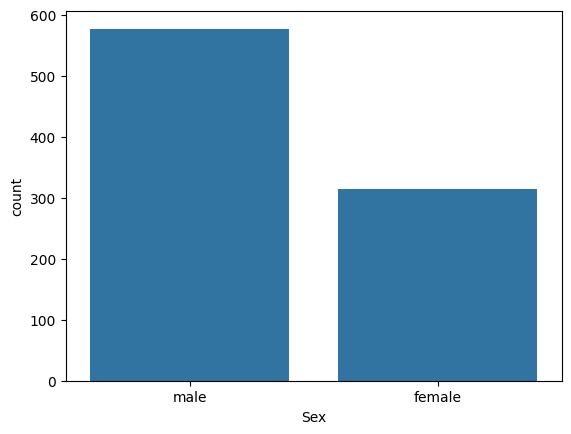

In [21]:

# Cargar el dataset
df = pd.read_csv('./Titanic-Dataset.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Resumen estadístico
print(df.describe())

# Visualización de algunas variables
sns.countplot(x='Survived', data=df)
plt.show()

sns.countplot(x='Pclass', data=df)
plt.show()

sns.countplot(x='Sex', data=df)
plt.show()


# Preprocesamiento de Datos

In [22]:
# Eliminar columnas innecesarias
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Tratar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convertir variables categóricas en numéricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


C:\Users\juanj\AppData\Local\Temp\ipykernel_23416\74635747.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\juanj\AppData\Local\Temp\ipykernel_23416\74635747.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Selección de Características

In [23]:
# Seleccionar características y variable objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']


# División del Dataset

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenamiento del Modelo

In [25]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

# Evaluación del Modelo

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.13625817679394478
R^2 Score: 0.4381147692850984


# Visualización de Resultados

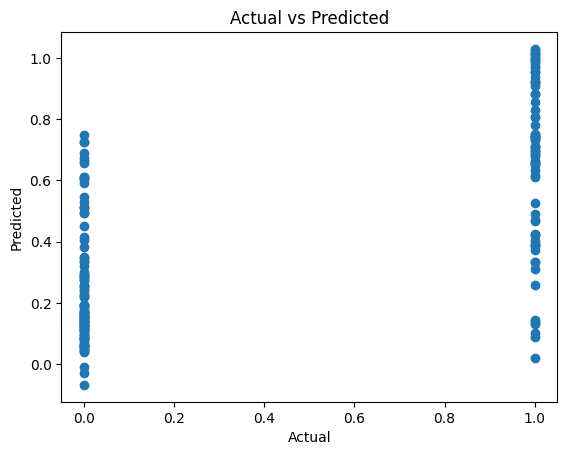

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
